In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load dataset
df=pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
#How many rows and columns 
df.shape

(1338, 8)

In [5]:
#How many samples in 1's and 0's 
df['insuranceclaim'].value_counts()

insuranceclaim
1    783
0    555
Name: count, dtype: int64

In [6]:
#given datset is the example of Binary Classification bcoz there are 
#2 classes 1 (yes) and 0(no)
#here target/output variable : insuranceclaim

In [7]:
#Step 1 : for preprocessing
#To check null values
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [8]:
#to check datatypes 
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

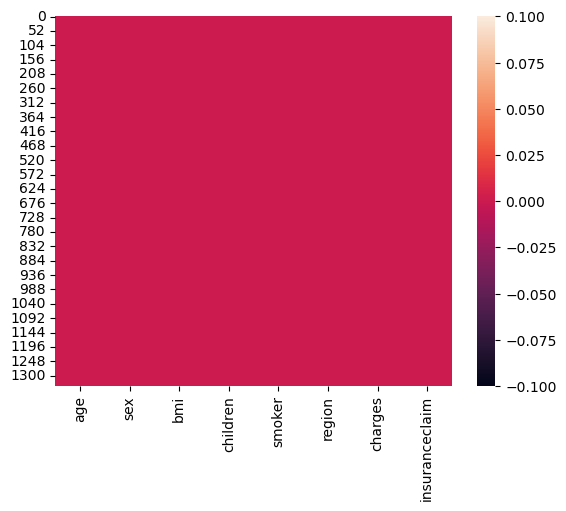

In [9]:
#Visualise the null values
sb.heatmap(df.isnull())
plt.show()

In [10]:
#Step 2 for preprocessing 
#to check duplicates rows
df.duplicated().sum()

1

In [11]:
#To delete duplicates rows permanently
df.drop_duplicates(inplace=True)

In [12]:
#to check duplicates rows
df.duplicated().sum()

0

In [13]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [15]:
df['sex'].value_counts()

sex
1    675
0    662
Name: count, dtype: int64

In [16]:
#Female : 0  and Male : 1 

In [17]:
df['smoker'].value_counts()

smoker
0    1063
1     274
Name: count, dtype: int64

In [18]:
df['region'].value_counts()  #east : 0 north :1 ,south : 2 , west  :4

region
2    364
3    325
1    324
0    324
Name: count, dtype: int64

In [19]:
df['children'].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [20]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [21]:
#Select input and output from given dataset
X=df.drop("insuranceclaim",axis=1) #select input(2D)
Y=df["insuranceclaim"] #select output(1D)

In [22]:
#train test split 70% and 30%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,
                                              random_state=1)

In [23]:
X.shape

(1337, 7)

In [24]:
X_train.shape,Y_train.shape

((935, 7), (935,))

In [25]:
X_test.shape,Y_test.shape

((402, 7), (402,))

In [26]:
Y_train.head(10)

520    1
575    1
770    0
314    1
426    0
914    0
737    0
751    1
446    1
554    1
Name: insuranceclaim, dtype: int64

In [27]:
X_train.head()

,age,sex,bmi,children,smoker,region,charges
520,50,0,27.360,0,0,0,25656.57526
575,58,0,27.170,0,0,1,12222.89830
770,61,1,36.100,3,0,3,27941.28758
314,27,0,31.400,0,1,3,34838.87300
426,38,0,27.265,1,0,0,6555.07035


In [28]:
#Apply Standard Scaler on X_train and X_test 
from sklearn.preprocessing import StandardScaler

In [29]:
#create object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [30]:
type(X_train),type(X_test),X_train.ndim,X_test.ndim

(numpy.ndarray, numpy.ndarray, 2, 2)

In [31]:
#Use classification Algorithm 
#1. Logistic Regression : its work on sigmoid function and return output
#in the form of 0 and 1 means probability's value 
from sklearn.linear_model import LogisticRegression

In [32]:
#create the object of LogisticRegression class 
lr=LogisticRegression() 
#lr is user defined object of LogisticRegression class

In [33]:
#train the model with LogisticRegression class (70% training data)
#use inbuilt method fit() of LogisticRegression class
lr.fit(X_train,Y_train)

LogisticRegression()

In [34]:
#Test the model with 30% data , use inbuilt method predict()
Y_pred=lr.predict(X_test)

In [35]:
Y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [36]:
dict={'Actual output':Y_test,'Predicted output':Y_pred}
df1=pd.DataFrame(dict)
df1

,Actual output,Predicted output
629,1,1
1087,1,1
283,1,1
790,1,1
594,1,1
...,...,...
924,0,0
873,1,0
731,0,0
363,0,0


In [37]:
#confusion_matrix inbuilt class   : create report of classification
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))

[[147  25]
 [ 21 209]]


In [38]:
#check all score (Recall ,precision,accuracy anf F1-score)
#inbuilt class classification_report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       172
           1       0.89      0.91      0.90       230

    accuracy                           0.89       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402



In [39]:
#conclusion :recall score : 0.91 :91% (1) good score but try more (means close to >95)
#and acccuracy (0.89 means 89%)
#Limitation / disadvantage of logistic  Regression : no select input Features Automatic to find 
#the output means target ,we have to use visualization method
#use second classification Alogrithm : DecisionTreeClassifier


In [40]:
#Advantage of  DecisionTreeClassifier :select important features to find the target
#with the help of Entropy /Gini Index method

In [41]:
#call  DecisionTreeClassifier class : inbuilt class
#model train with thr help of  DecisionTreeClassifier class

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
#create the object of  DecisionTreeClassifier class
dt= DecisionTreeClassifier(random_state=1) #by default use gini index
#dt user defined object of  DecisionTreeClassifier class

In [44]:
#train the model from DecisionTreeClassifier class with 70% training input and training output
#use inbuilt method fit() of DecisionTreeClassifier class
dt.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=1)

In [45]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [46]:
#to check information gain from each input to find the output variable
#use inbuilt attributes feature_importances_ of DecisionTreeClassifier class
dt.feature_importances_

array([0.08256787, 0.        , 0.33015759, 0.37755021, 0.18086023,
       0.        , 0.0288641 ])

In [47]:
dict={'Input Columns':X.columns,"IG":dt.feature_importances_}
#IG eans iformation gain
#convert dictionary into dataframe
df1=pd.DataFrame(dict)
df1

,Input Columns,IG
0,age,0.082568
1,sex,0.000000
2,bmi,0.330158
3,children,0.377550
4,smoker,0.180860
5,region,0.000000
6,charges,0.028864


In [48]:
#sorting dataframe df1 according to IG columns in descending order
#use inbuilt method sort_values() of pandas library
df1.sort_values("IG",ascending=False) #by default ascending=false means descending order

,Input Columns,IG
3,children,0.377550
2,bmi,0.330158
4,smoker,0.180860
0,age,0.082568
6,charges,0.028864
1,sex,0.000000
5,region,0.000000


In [49]:
#test the model with 30% data use inbuilt method predict() of DecisionTreeClassifier class
Y_pred=dt.predict(X_test)

In [50]:
Y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [51]:
#Report generate
print(confusion_matrix(Y_test,Y_pred))

[[168   4]
 [  9 221]]


In [52]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       172
           1       0.98      0.96      0.97       230

    accuracy                           0.97       402
   macro avg       0.97      0.97      0.97       402
weighted avg       0.97      0.97      0.97       402



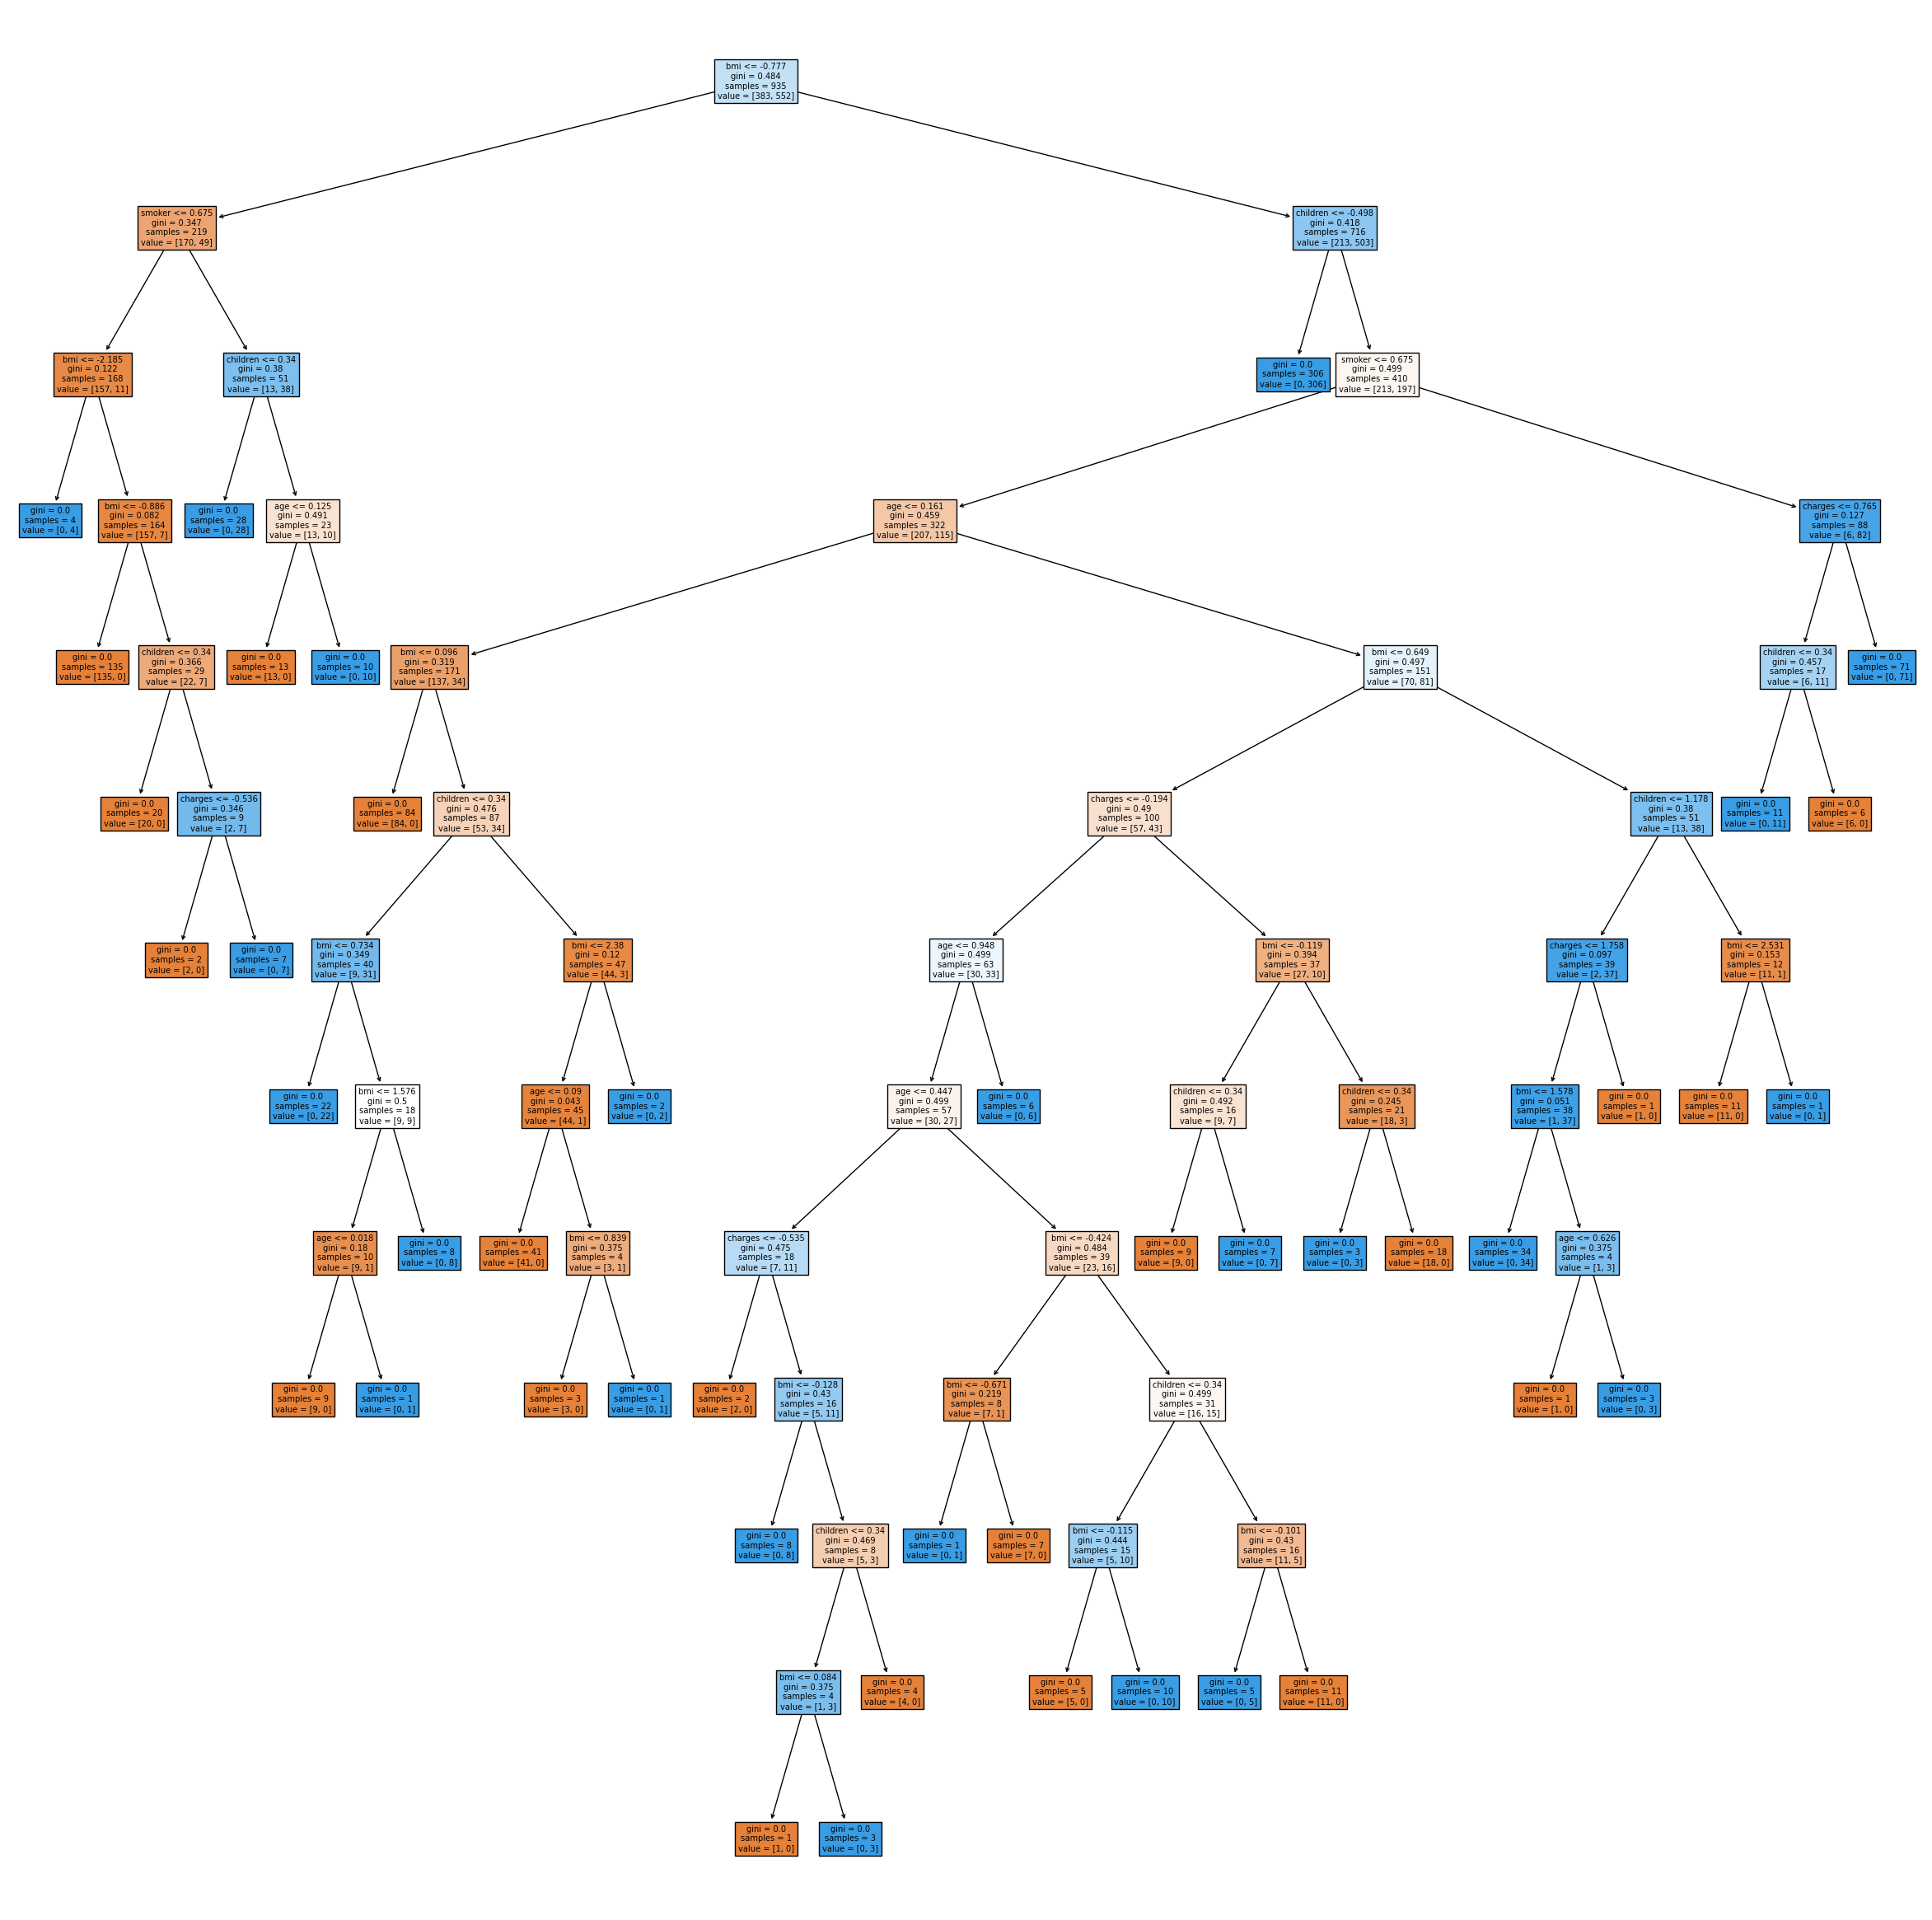

In [53]:
#create a tree
features=X.columns.tolist() #to store all input columns in feature auser defined list object
from sklearn import tree
plt.figure(figsize=(30,30))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [54]:
#Recall =96% and accuracy=97% in DecisionTreeClassifier with gini index
#this score is best score


In [55]:
#Model train with the help of  DecisionTreeClassifier with Entropy 
#formula -P*log(P)-Q*log(Q)
#P means probability of Yes 
#and Q means Probability of No


In [56]:
#create object of DecisionTreeClassifier class and passing the parameter for
dt1=DecisionTreeClassifier(random_state=1,criterion='entropy')
#by default criterion parameter='gini'

In [57]:
#train the model
dt1.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [58]:
dict={'Input Columns':X.columns,'IG':dt1.feature_importances_ }
#IG means information Gain
#convert dictionary into DataFrame
df1=pd.DataFrame(dict)
#sorting dataframe df1 according to IG column in descending order 
#use inbuilt method sort_values() of pandas library
df1.sort_values('IG',ascending=False) #by default ascending=True means ascending order

,Input Columns,IG
2,bmi,0.448999
3,children,0.268376
4,smoker,0.156672
0,age,0.086761
6,charges,0.039192
1,sex,0.000000
5,region,0.000000


In [59]:
#test the model with 30% data use inbuilt method predict() of DecisionTreeClassifier class
Y_pred=dt1.predict(X_test)

In [60]:
#Report generate
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[171   1]
 [  4 226]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       172
           1       1.00      0.98      0.99       230

    accuracy                           0.99       402
   macro avg       0.99      0.99      0.99       402
weighted avg       0.99      0.99      0.99       402



In [61]:
#conclusion : DecisionTreeClassifier with Entropy is best for this dataset
#Recall=98% and accuracy =99%
